In [ ]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [60]:
# Load dataset
input_path = "../data/raw_data.csv"
df = pd.read_csv(input_path)
print(f"\nRaw dataset loaded from: {input_path}\n")
print(f"\nShape: {df.shape}\n")
display(df.head())



Raw dataset loaded from: ../data/raw_data.csv


Shape: (2000, 29)



,Company_ID,Industry_Type,Company_Size,Location_Region,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Technique,...,Methane_Emissions_tons_per_year,Water_Pollution_Index,Soil_Pollution_Index,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,CSR_Initiatives_on_Waste,Public_Sustainability_Reports,Perfect_Waste_Decomposition_System
0,C0640,Pharma,Medium,Rural,17332.66,42,48,10,67,Mixed,...,28.83,2,25,Yes,Yes,11,86,Yes,Yes,1
1,C1460,Textile,Medium,Rural,15774.52,20,40,40,70,Landfill,...,253.86,97,82,Yes,Yes,4,30,Yes,Yes,0
2,C1839,Food,Small,Rural,3487.97,45,35,20,57,Composting,...,226.16,99,56,No,Yes,4,17,No,No,0
3,C1646,Automobile,Small,Semi-Urban,520.20,12,51,37,70,Incineration,...,138.41,50,82,Yes,No,4,24,Yes,Yes,0
4,C0149,Food,Small,Rural,1861.76,62,37,1,83,Anaerobic Digestion,...,20.16,20,3,Yes,Yes,11,68,Yes,Yes,1


In [61]:
print(f"\n{df.info()}\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company_ID                             2000 non-null   object 
 1   Industry_Type                          2000 non-null   object 
 2   Company_Size                           2000 non-null   object 
 3   Location_Region                        2000 non-null   object 
 4   Total_Waste_Generated_kg_per_month     2000 non-null   float64
 5   Biodegradable_Waste_%                  2000 non-null   int64  
 6   Recyclable_Waste_%                     2000 non-null   int64  
 7   Hazardous_Waste_%                      2000 non-null   int64  
 8   Waste_Segregation_Level_%              2000 non-null   int64  
 9   Decomposition_Technique                2000 non-null   object 
 10  Decomposition_Efficiency_%             2000 non-null   int64  
 11  Recy

In [62]:
print(df.isnull().sum())
print(f"\nShape: {df.shape}\n")



Company_ID                               0
Industry_Type                            0
Company_Size                             0
Location_Region                          0
Total_Waste_Generated_kg_per_month       0
Biodegradable_Waste_%                    0
Recyclable_Waste_%                       0
Hazardous_Waste_%                        0
Waste_Segregation_Level_%                0
Decomposition_Technique                  0
Decomposition_Efficiency_%               0
Recycling_Rate_%                         0
Hazardous_Waste_Treatment_Compliance     0
Waste_to_Energy_Usage                    0
ISO_14001_Certified                      0
Zero_Waste_Landfill_Certified            0
Govt_Compliance_Status                   0
Environmental_Fines_Count                0
CO2_Emissions_tons_per_year              0
Methane_Emissions_tons_per_year          0
Water_Pollution_Index                    0
Soil_Pollution_Index                     0
Employee_Training_in_Waste_Management    0
Digital_Was

In [63]:
df.drop_duplicates(inplace=True)
print(f"\nShape after removing duplicates: {df.shape}\n")


Shape after removing duplicates: (2000, 29)



In [64]:
from sklearn.preprocessing import LabelEncoder

# Show initial shape and sample data
print(f"\nShape before encoding categorical variables: {df.shape}\n")
display(df.head())

# 1. List of binary categorical columns to encode using LabelEncoder
label_encode_cols = [
    'Hazardous_Waste_Treatment_Compliance',
    'Waste_to_Energy_Usage',
    'Zero_Waste_Landfill_Certified',
    'ISO_14001_Certified',
    'Employee_Training_in_Waste_Management',
    'Digital_Waste_Tracking',
    'CSR_Initiatives_on_Waste',
    'Public_Sustainability_Reports'
]

# Initialize a LabelEncoder
label = LabelEncoder()

# Apply LabelEncoder to each binary column
for col in label_encode_cols:
    df[col] = label.fit_transform(df[col])

print(f"\nShape after encoding categorical variables: {df.shape}\n")



Shape before encoding categorical variables: (2000, 29)



,Company_ID,Industry_Type,Company_Size,Location_Region,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Technique,...,Methane_Emissions_tons_per_year,Water_Pollution_Index,Soil_Pollution_Index,Employee_Training_in_Waste_Management,Digital_Waste_Tracking,Frequency_of_Waste_Audit_per_year,Eco_Friendly_Raw_Materials_%,CSR_Initiatives_on_Waste,Public_Sustainability_Reports,Perfect_Waste_Decomposition_System
0,C0640,Pharma,Medium,Rural,17332.66,42,48,10,67,Mixed,...,28.83,2,25,Yes,Yes,11,86,Yes,Yes,1
1,C1460,Textile,Medium,Rural,15774.52,20,40,40,70,Landfill,...,253.86,97,82,Yes,Yes,4,30,Yes,Yes,0
2,C1839,Food,Small,Rural,3487.97,45,35,20,57,Composting,...,226.16,99,56,No,Yes,4,17,No,No,0
3,C1646,Automobile,Small,Semi-Urban,520.20,12,51,37,70,Incineration,...,138.41,50,82,Yes,No,4,24,Yes,Yes,0
4,C0149,Food,Small,Rural,1861.76,62,37,1,83,Anaerobic Digestion,...,20.16,20,3,Yes,Yes,11,68,Yes,Yes,1



Shape after encoding categorical variables: (2000, 29)



In [65]:
    # 2. List of non-binary categorical columns to one-hot encode
one_hot_encode_cols = [
    'Industry_Type',
    'Company_Size',
    'Location_Region',
    'Decomposition_Technique',
    'Govt_Compliance_Status'
]

# Apply one-hot encoding using pd.get_dummies()
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)


# Convert any bool columns to integers (True → 1, False → 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


# Show final shape and preview of encoded DataFrame
print(f"\nShape after encoding categorical variables: {df.shape}\n")
display(df.head())



Shape after encoding categorical variables: (2000, 41)



,Company_ID,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Waste_to_Energy_Usage,...,Company_Size_Small,Location_Region_Semi-Urban,Location_Region_Urban,Decomposition_Technique_Composting,Decomposition_Technique_Incineration,Decomposition_Technique_Landfill,Decomposition_Technique_Mixed,Decomposition_Technique_Recycling,Govt_Compliance_Status_Non-Compliant,Govt_Compliance_Status_Pending
0,C0640,17332.66,42,48,10,67,85,90,1,1,...,0,0,0,0,0,0,1,0,0,0
1,C1460,15774.52,20,40,40,70,51,28,0,0,...,0,0,0,0,0,1,0,0,1,0
2,C1839,3487.97,45,35,20,57,41,15,0,1,...,1,0,0,1,0,0,0,0,0,1
3,C1646,520.20,12,51,37,70,60,45,1,1,...,1,1,0,0,1,0,0,0,1,0
4,C0149,1861.76,62,37,1,83,90,84,1,1,...,1,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Select numeric columns with more than 2 unique values (exclude binary)
num_cols = [col for col in df.select_dtypes(include='number').columns if df[col].nunique() > 2]

# Scale selected numeric columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print(f"\nShape after scaling numerical features: {df.shape}\n")
display(df.head())


Shape after scaling numerical features: (2000, 41)



,Company_ID,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Waste_to_Energy_Usage,...,Company_Size_Small,Location_Region_Semi-Urban,Location_Region_Urban,Decomposition_Technique_Composting,Decomposition_Technique_Incineration,Decomposition_Technique_Landfill,Decomposition_Technique_Mixed,Decomposition_Technique_Recycling,Govt_Compliance_Status_Non-Compliant,Govt_Compliance_Status_Pending
0,C0640,0.020863,0.510931,0.779223,-1.222828,0.191415,0.683054,1.198747,1,1,...,0,0,0,0,0,0,1,0,0,0
1,C1460,-0.085332,-1.252144,0.113505,1.107922,0.327186,-1.123123,-1.163391,0,0,...,0,0,0,0,0,1,0,0,1,0
2,C1839,-0.922726,0.751350,-0.302569,-0.445911,-0.261156,-1.654352,-1.658678,0,1,...,1,0,0,1,0,0,0,0,0,1
3,C1646,-1.124996,-1.893262,1.028868,0.874847,0.327186,-0.645018,-0.515708,1,1,...,1,1,0,0,1,0,0,0,1,0
4,C0149,-1.033561,2.113726,-0.136139,-1.922054,0.915528,0.948668,0.970153,1,1,...,1,0,0,0,0,0,0,0,0,0


In [67]:
df['Total_Recyclable_Waste_%'] = df['Recyclable_Waste_%'] + df['Biodegradable_Waste_%']

df['Pollution_Impact_Index'] = df[[
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'CO2_Emissions_tons_per_year',
    'Methane_Emissions_tons_per_year'
]].mean(axis=1)

df['Training_and_Compliance_Score'] = df[
    ['Employee_Training_in_Waste_Management', 'Hazardous_Waste_Treatment_Compliance', 'ISO_14001_Certified']
].sum(axis=1)

# Binning waste audit frequency
df['Waste_Audit_Frequency_Category'] = pd.cut(
    df['Frequency_of_Waste_Audit_per_year'],
    bins=[-1, 2, 6, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Optionally encode the new categorical column
df['Waste_Audit_Frequency_Category'] = label.fit_transform(df['Waste_Audit_Frequency_Category'])

print(f"\nShape after feature engineering: {df.shape}\n")
display(df.head())



Shape after feature engineering: (2000, 45)



,Company_ID,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Waste_to_Energy_Usage,...,Decomposition_Technique_Incineration,Decomposition_Technique_Landfill,Decomposition_Technique_Mixed,Decomposition_Technique_Recycling,Govt_Compliance_Status_Non-Compliant,Govt_Compliance_Status_Pending,Total_Recyclable_Waste_%,Pollution_Impact_Index,Training_and_Compliance_Score,Waste_Audit_Frequency_Category
0,C0640,0.020863,0.510931,0.779223,-1.222828,0.191415,0.683054,1.198747,1,1,...,0,0,1,0,0,0,1.290154,-0.957657,3,0
1,C1460,-0.085332,-1.252144,0.113505,1.107922,0.327186,-1.123123,-1.163391,0,0,...,0,1,0,0,1,0,-1.138639,0.996065,1,0
2,C1839,-0.922726,0.751350,-0.302569,-0.445911,-0.261156,-1.654352,-1.658678,0,1,...,0,0,0,0,0,1,0.448781,0.958881,1,0
3,C1646,-1.124996,-1.893262,1.028868,0.874847,0.327186,-0.645018,-0.515708,1,1,...,1,0,0,0,1,0,-0.864394,0.900388,3,0
4,C0149,-1.033561,2.113726,-0.136139,-1.922054,0.915528,0.948668,0.970153,1,1,...,0,0,0,0,0,0,1.977587,-1.010234,3,0



Shape after dropping unnecessary columns: (2000, 44)



,Total_Waste_Generated_kg_per_month,Biodegradable_Waste_%,Recyclable_Waste_%,Hazardous_Waste_%,Waste_Segregation_Level_%,Decomposition_Efficiency_%,Recycling_Rate_%,Hazardous_Waste_Treatment_Compliance,Waste_to_Energy_Usage,ISO_14001_Certified,...,Decomposition_Technique_Incineration,Decomposition_Technique_Landfill,Decomposition_Technique_Mixed,Decomposition_Technique_Recycling,Govt_Compliance_Status_Non-Compliant,Govt_Compliance_Status_Pending,Total_Recyclable_Waste_%,Pollution_Impact_Index,Training_and_Compliance_Score,Waste_Audit_Frequency_Category
0,0.020863,0.510931,0.779223,-1.222828,0.191415,0.683054,1.198747,1,1,1,...,0,0,1,0,0,0,1.290154,-0.957657,3,0
1,-0.085332,-1.252144,0.113505,1.107922,0.327186,-1.123123,-1.163391,0,0,0,...,0,1,0,0,1,0,-1.138639,0.996065,1,0
2,-0.922726,0.751350,-0.302569,-0.445911,-0.261156,-1.654352,-1.658678,0,1,1,...,0,0,0,0,0,1,0.448781,0.958881,1,0
3,-1.124996,-1.893262,1.028868,0.874847,0.327186,-0.645018,-0.515708,1,1,1,...,1,0,0,0,1,0,-0.864394,0.900388,3,0
4,-1.033561,2.113726,-0.136139,-1.922054,0.915528,0.948668,0.970153,1,1,1,...,0,0,0,0,0,0,1.977587,-1.010234,3,0


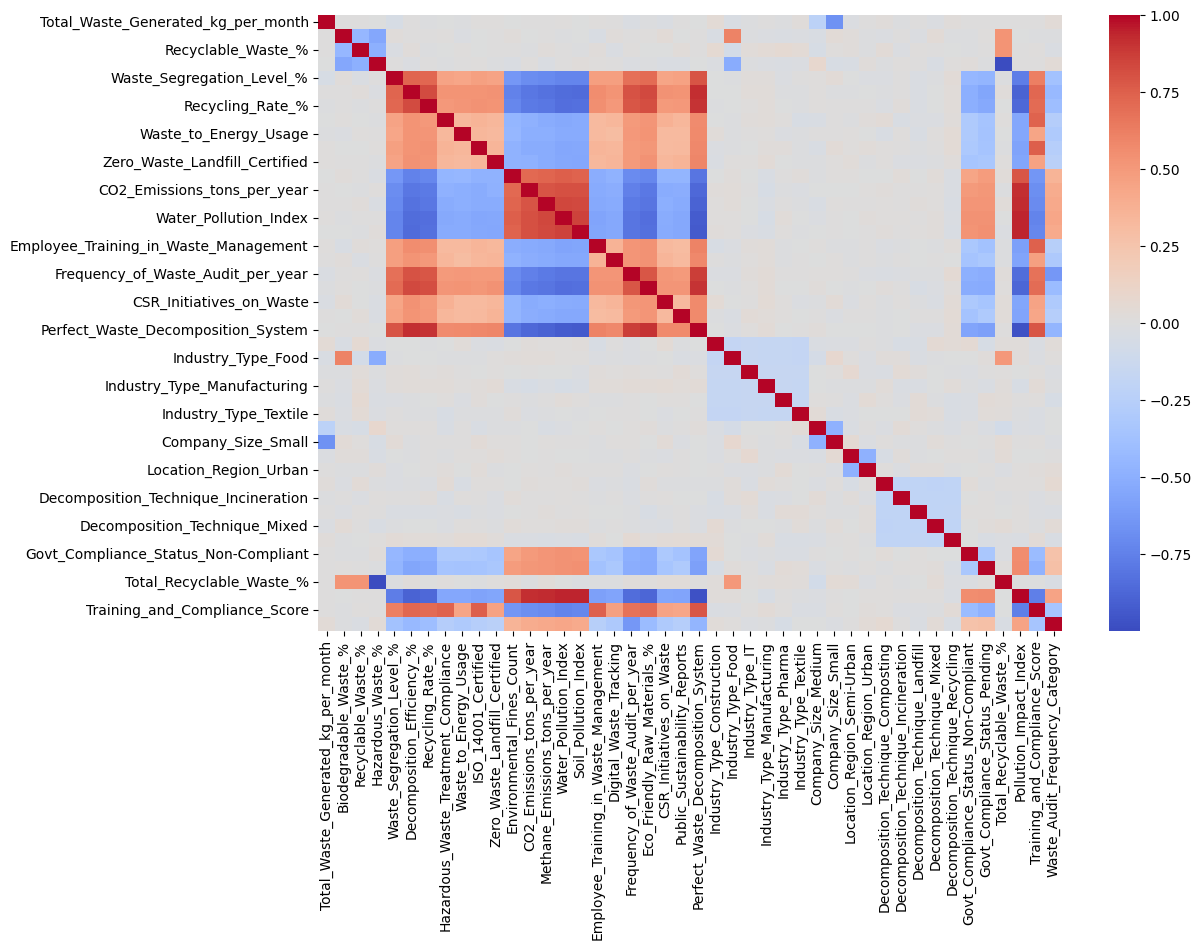

In [68]:
df.drop(columns=['Company_ID'], inplace=True)
print(f"\nShape after dropping unnecessary columns: {df.shape}\n")

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = df.corr()

# Heatmap to spot redundancy
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")


display(df.head())

In [69]:
from sklearn.decomposition import PCA

# Select only numeric columns for PCA
X_numeric = df.select_dtypes(include=['float64','int64'])

# Scale before PCA (important!)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_numeric.shape)
print("Reduced shape:", X_pca.shape)


Original shape: (2000, 44)
Reduced shape: (2000, 27)


In [70]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Total_Waste_Generated_kg_per_month     2000 non-null   float64
 1   Biodegradable_Waste_%                  2000 non-null   float64
 2   Recyclable_Waste_%                     2000 non-null   float64
 3   Hazardous_Waste_%                      2000 non-null   float64
 4   Waste_Segregation_Level_%              2000 non-null   float64
 5   Decomposition_Efficiency_%             2000 non-null   float64
 6   Recycling_Rate_%                       2000 non-null   float64
 7   Hazardous_Waste_Treatment_Compliance   2000 non-null   int64  
 8   Waste_to_Energy_Usage                  2000 non-null   int64  
 9   ISO_14001_Certified                    2000 non-null   int64  
 10  Zero_Waste_Landfill_Certified          2000 non-null   int64  
 11  Envi

None

In [71]:
import pandas as pd

# Convert PCA output (NumPy array) back to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Add target back to dataset
final_df = pd.concat([X_pca_df, pd.Series(y, name="Perfect_Waste_Decomposition_System")], axis=1)

# Save to CSV
final_df.to_csv("../data/preprocessed_compliance_pca.csv", index=False)


 Step 4: Save Processed Dataset

In [73]:
from sklearn.model_selection import train_test_split

# Features (X) are PCA components
X = X_pca
# Labels (y) are your target column
y = df["Perfect_Waste_Decomposition_System"]

# Train 70% / Test 30% split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels distribution:\n", y_train.value_counts(normalize=True))
print("Testing labels distribution:\n", y_test.value_counts(normalize=True))
# Save splits to CSV
train_df = pd.DataFrame(X_train, columns=[f'PC{i+1}' for i in range(X_train.shape[1])])
train_df['Perfect_Waste_Decomposition_System'] = y_train.values
train_df.to_csv("../data/train_compliance_pca.csv", index=False)    
test_df = pd.DataFrame(X_test, columns=[f'PC{i+1}' for i in range(X_test.shape[1])])
test_df['Perfect_Waste_Decomposition_System'] = y_test.values
test_df.to_csv("../data/test_compliance_pca.csv", index=False)

Training set shape: (1400, 27)
Testing set shape: (600, 27)
Training labels distribution:
 Perfect_Waste_Decomposition_System
0    0.5
1    0.5
Name: proportion, dtype: float64
Testing labels distribution:
 Perfect_Waste_Decomposition_System
0    0.5
1    0.5
Name: proportion, dtype: float64
